In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import tree
import graphviz
from sklearn.ensemble import GradientBoostingRegressor
from pdpbox import pdp, get_dataset, info_plots
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

ModuleNotFoundError: No module named 'pdpbox'

In [ ]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [ ]:
regr.feature_importances_

In [2]:
boston.feature_names

NameError: name 'boston' is not defined

### Feature Importance

Text(0.5, 0, 'Decision Tree Feature Importance')

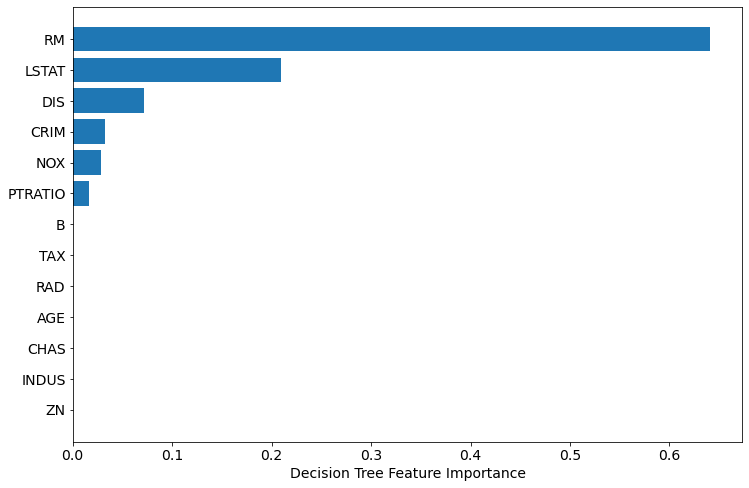

In [7]:
sorted_idx = regr.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], regr.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

### Permutation Importance

In [8]:
perm_importance = permutation_importance(regr, X_test, y_test)

Text(0.5, 0, 'Decision Tree Permutation Importance')

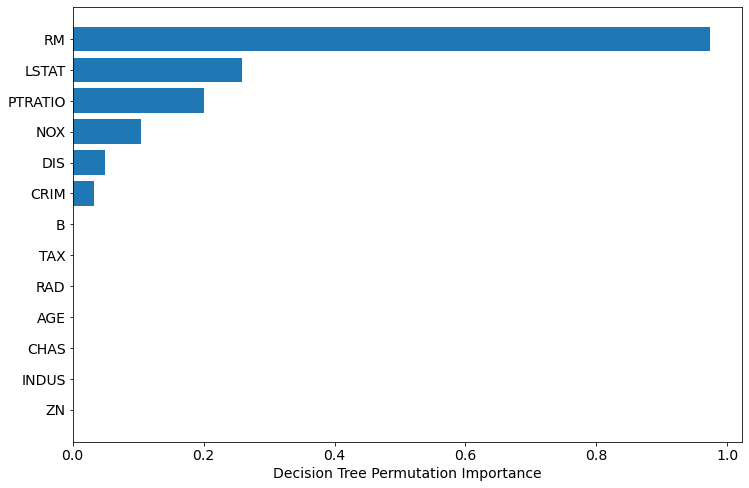

In [9]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Decision Tree Permutation Importance")

### Eli5 Permutation Importance

In [10]:
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.0523 ± 0.1100,RM
0.2337 ± 0.1259,LSTAT
0.1259 ± 0.1236,PTRATIO
0.0684 ± 0.0351,NOX
0.0567 ± 0.0361,DIS
0.0256 ± 0.0256,CRIM
0 ± 0.0000,B
0 ± 0.0000,TAX
0 ± 0.0000,RAD
0 ± 0.0000,AGE


In [11]:
eli5.show_prediction(regr, X_test.iloc[0],
                    feature_names=list(boston.feature_names),
                    show_feature_values=True)

### Tree Decomposition

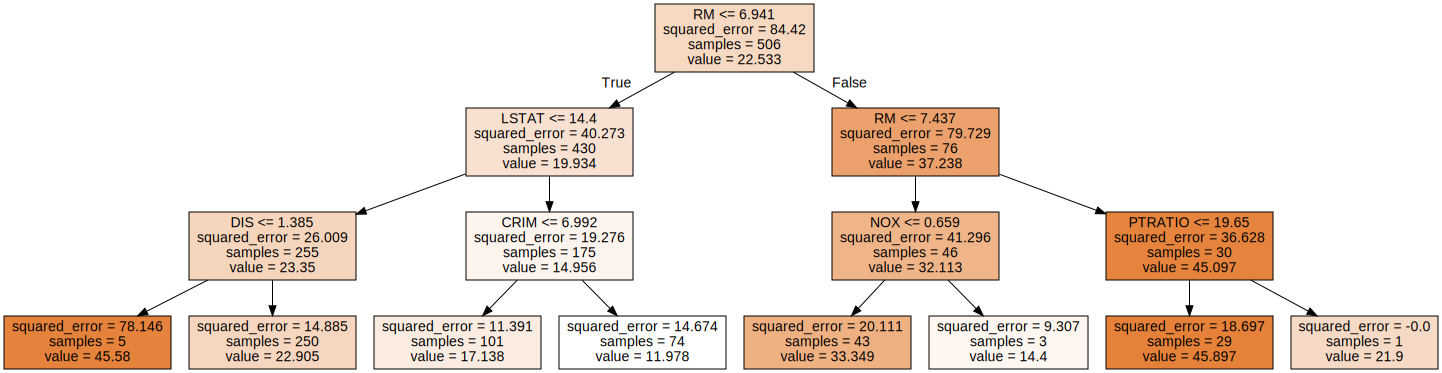

In [12]:
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=boston.feature_names,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

### Partial Dependance Plot

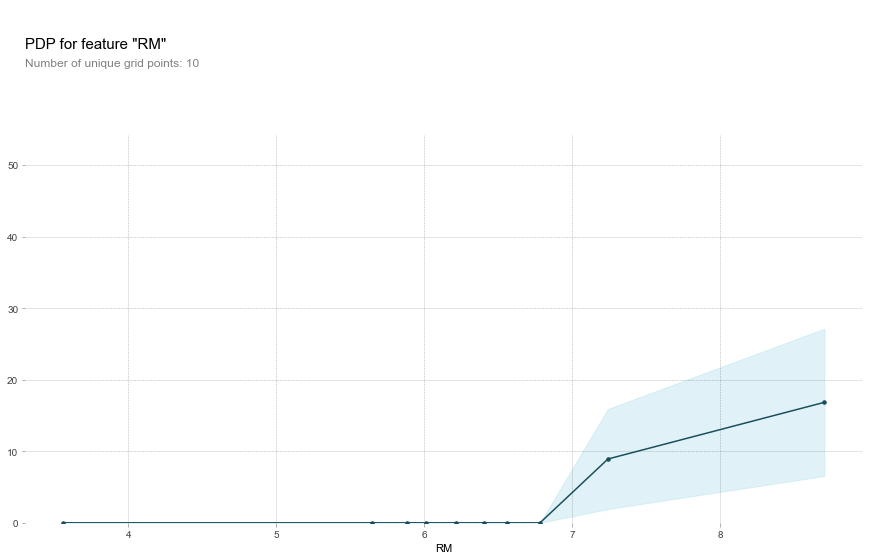

In [17]:
pdp_goals = pdp.pdp_isolate(model= regr, dataset= X_test, model_features= boston.feature_names, feature='RM')
pdp.pdp_plot(pdp_goals, 'RM')
plt.show()